# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/sumainhemani/Documents/Homework/Data-visualization-challenge/Mouse_metadata.csv"
study_results_path = "/Users/sumainhemani/Documents/Homework/Data-visualization-challenge/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_info = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
combined_info.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [19]:
# Checking the number of mice.
unique_mice = combined_info["Mouse ID"].nunique()
unique_mice

249

In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_info[combined_info[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mice_ID = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ID



array(['g989'], dtype=object)

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_info.loc[combined_info["Mouse ID"] == duplicate_mice_ID[0]]
duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_info[combined_info["Mouse ID"].isin(duplicate_mice_ID) == False]
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [23]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data_df["Mouse ID"].unique()
clean_mice_number = len(clean_mice)
clean_mice_number


248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).mean()
median = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).median()
var = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).var()
std = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).std()
sem = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Tumor Volume Variance": var,
                              "Tumor Volume Standard Deviation": std,
                              "Tumor Volume Standard Error": sem})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
agg_summary_stats = clean_data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stats


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

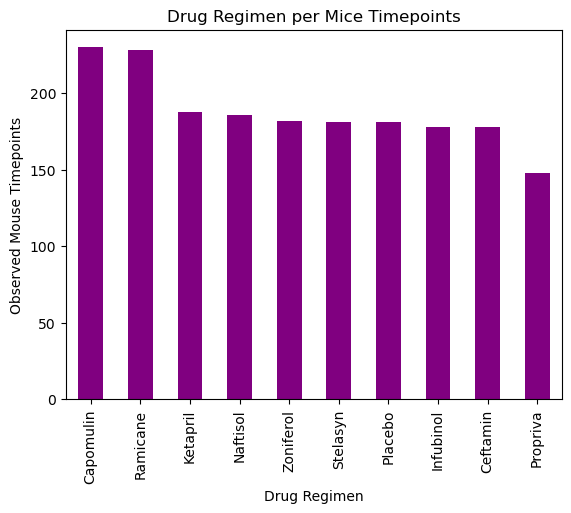

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_data_df["Drug Regimen"].value_counts()
mice_count
bar_plot_pandas = mice_count.plot(kind = "bar", color = "purple", title = "Drug Regimen per Mice Timepoints", xlabel= "Drug Regimen", ylabel= "Observed Mouse Timepoints")


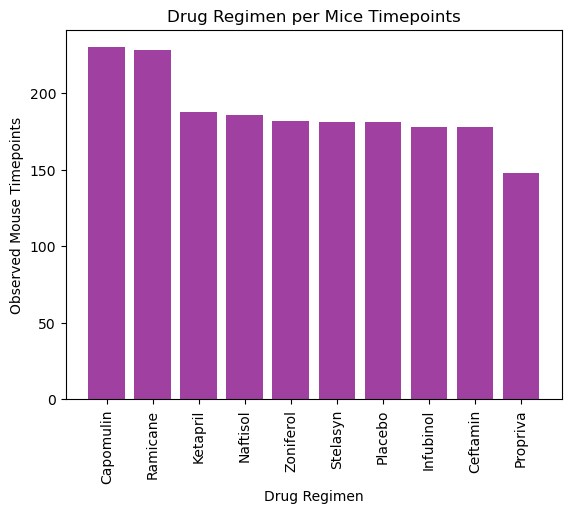

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color = "purple", alpha = 0.75, align= "center")
plt.title("Drug Regimen per Mice Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.show()

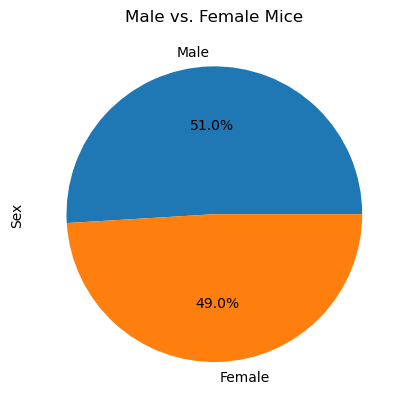

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_data_df["Sex"].value_counts()
pie_chart_pandas = mice_gender.plot(kind = "pie", autopct="%1.1f%%", title = "Male vs. Female Mice", ylabel= "Sex")

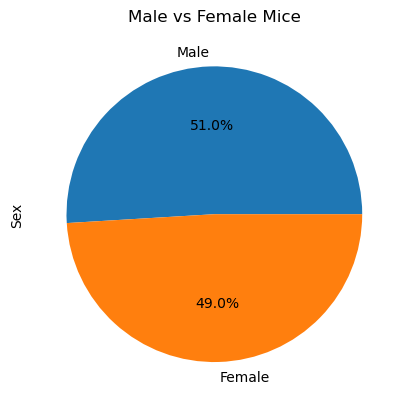

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot = mice_gender.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.title("Male vs Female Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_drug_data = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Capomulin") | (clean_data_df["Drug Regimen"] == "Ramicane") |
                                        (clean_data_df["Drug Regimen"] == "Infubinol") |(clean_data_df["Drug Regimen"] == "Ceftamin") ]


#Start by getting the last (greatest) timepoint for each mouse
last_timepoint = reduced_drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_timepoint = last_timepoint.reset_index()
# reduce_last_tp=reduced_drug_data[reduced_drug_data[["Drug Regimen", "Tumor Volume (mm3)"]]]
reduced_last_timepoint=new_last_timepoint[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_timepoint

Capomulin_df = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Capomulin"]
Capomulin_df

Ramicane_df = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Ramicane"]
Ramicane_df

Infubinol_df = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Infubinol"]
Infubinol_df

Ceftamin_df = reduced_last_timepoint.loc[reduced_last_timepoint["Drug Regimen"] == "Ceftamin"]
Ceftamin_df

Last_tps_df = pd.DataFrame({"Capomulin": Capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": Ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": Infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": Ceftamin_df["Tumor Volume (mm3)"]})

Last_tps_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen_list:    
    quartiles = Last_tps_df[drug].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = Last_tps_df.mean()
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = Last_tps_df.loc[Last_tps_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume.append(final_tumor_volume)

    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    


KeyError: 'Drug Regimen'

Text(0.5, 0, '')

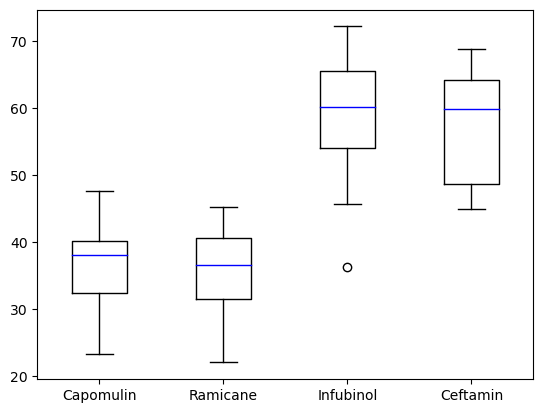

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = Last_tps_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_xlabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

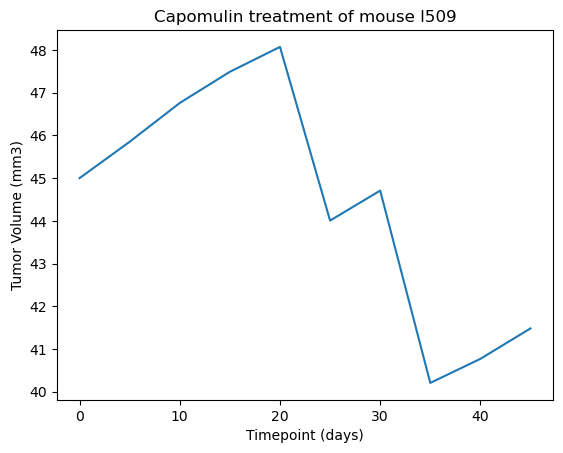

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_data_df.loc[(combined_info["Drug Regimen"] == "Capomulin") & (combined_info["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#determine values and plot
timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

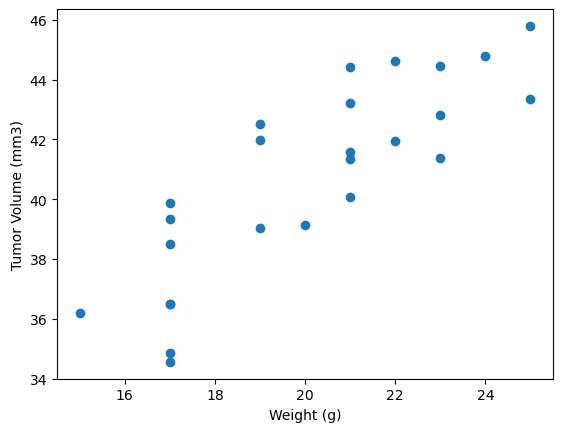

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = combined_info.loc[(combined_info["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})

plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


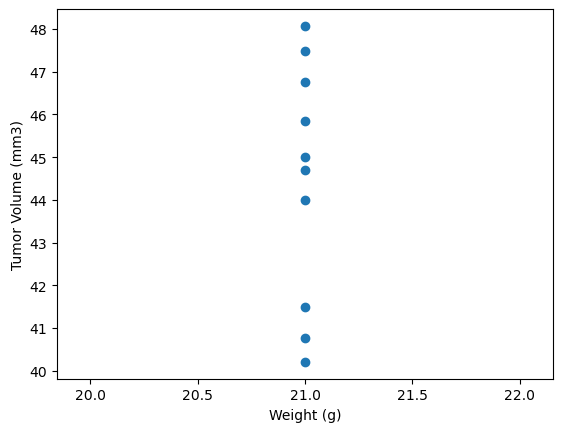

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=capomulin_df["Weight (g)"]
y_values=capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
